# 2018 Mashine Learning course at the Faculty of Physics, Astronomy and Applied Computer Science

## Homework no. 1
by Robert Bialy

#### Homework description
Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

\\( f(x)=cos(\frac{3}{2}\pi x) \\)

In [70]:
def my_first_func(x):
    return np.cos(1.5 * np.pi * x)

\\( f(x)=sin(\frac{3}{2}\pi x*cos(\frac{3}{2}\pi x)) \\)

In [71]:
def my_second_func(x):
    return np.sin(1.5 * np.pi * x * np.cos(1.5 * np.pi * x))

In [72]:
def draw_mse_plot(x, y):
    mse = list()
    std = list()
    plt.figure(figsize=(10, 5))
    for degree in range(1,31):
        polynomial_features = PolynomialFeatures(degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
        scores = cross_val_score(pipeline, x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
        mse.append(-scores.mean())
        std.append(scores.std())
        
    plt.xlabel("degrees", fontsize=14)
    plt.ylabel("mean square error", fontsize=14)
    plt.xlim((0, 30))
    plt.ylim((0, max(mse)))
    plt.plot(range(1,31), mse)
    plt.show()

In [73]:
def get_MSE(funtion, samples, noise_level):
    np.random.seed(0)
    x = np.sort(np.random.rand(samples))

    y = funtion(x) + np.random.randn(n_samples) * noise_level
    draw_mse_plot(x,y)

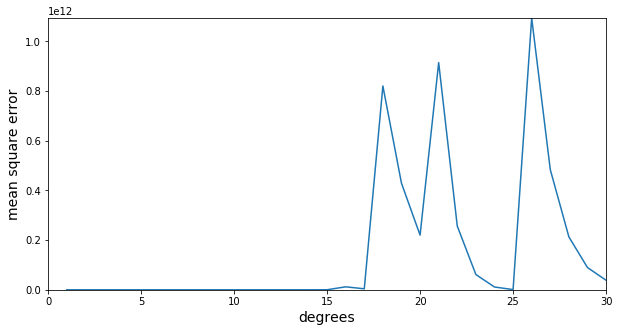

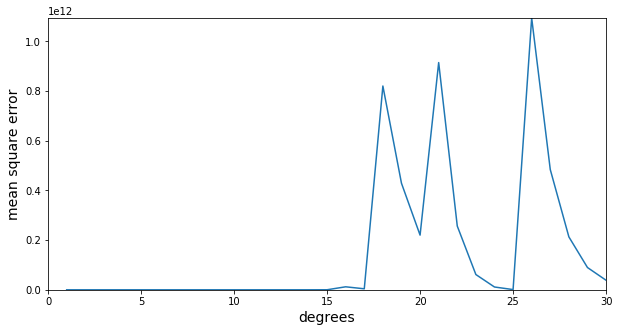

In [74]:
get_MSE(my_first_func, 30, 0.1)
get_MSE(my_second_func, 30, 0.1)

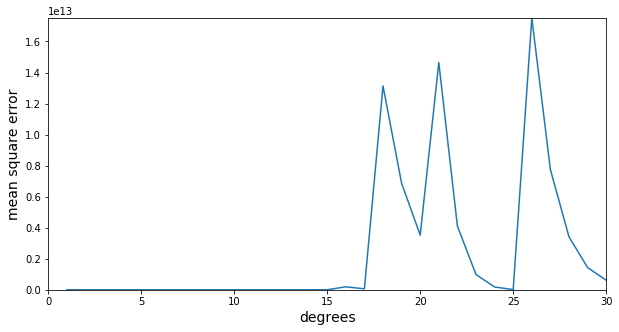

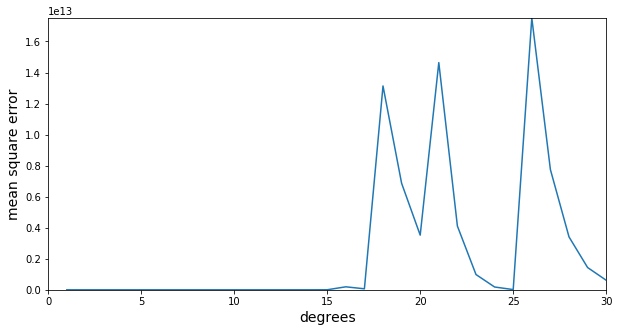

In [68]:
get_MSE(my_first_func, 30, 0.4)
get_MSE(my_second_func, 30, 0.4)

In [69]:
get_MSE(my_first_func, 100, 0.4)
get_MSE(my_second_func, 100, 0.4)

ValueError: operands could not be broadcast together with shapes (100,) (30,) 